In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ZebraLib as zb
from scipy.integrate import quad, solve_ivp
import scipy.io

#Encontrar tau e K
def find_coef(t, y, S):
    T0, Ta  = S
    A = 5
    K = y[700::].mean()
    y_tau = Ta + 0.368*(T0-Ta)
    index = zb.get_index_of_nearest_element(y, y_tau)
    tau = t[index]
    return tau[0], K/Ta

#Dados
mat_l = scipy.io.loadmat('D:/UNESP/EngMec-UNESP/Controle Sistemas/Laboratórios/Lab 5 - Ganho/medicao_longe.mat')
mat_p = scipy.io.loadmat('D:/UNESP/EngMec-UNESP/Controle Sistemas/Laboratórios/Lab 5 - Ganho/medicao_proxima.mat')

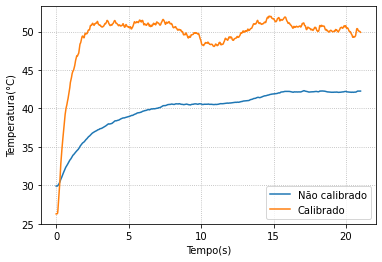

In [48]:
#%matplotlib
fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='Temperatura(°C)')

ax.plot(mat_l['data1'], mat_l['data2'], label='Não calibrado')
ax.plot(mat_l['data1'], mat_l['data3'], label='Calibrado')

ax.legend()
ax.grid(ls='dotted')

fig.savefig('res_longe.pdf', bbox_inches='tight', dpi=600)

In [49]:
tau1, K1 = find_coef(mat_l['data1'], mat_l['data2'],(30,160))
tau2, K2 = find_coef(mat_l['data1'], mat_l['data3'],(30,160))

print(f'tau: {tau1:.2f} --- k: {K1:.2f} - calibrado')
print(f'tau: {tau2:.2f} --- k: {K2:.2f} - nao calibrado')
#print(f'Ganho: {abs(K1-K2)}')

tau: 17.10 --- k: 0.26 - calibrado
tau: 14.68 --- k: 0.32 - nao calibrado


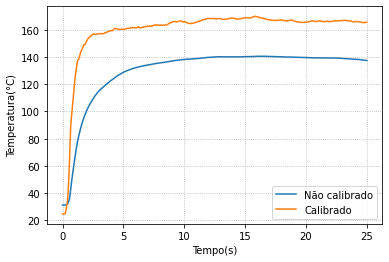

In [50]:
#%matplotlib
fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='Temperatura(°C)')

ax.plot(mat_p['data1'], mat_p['data2'], label='Não calibrado')
ax.plot(mat_p['data1'], mat_p['data3'], label='Calibrado')

ax.legend()
ax.grid(ls='dotted')

fig.savefig('res_perto.pdf', bbox_inches='tight', dpi=600)

In [51]:
tau1, K1 = find_coef(mat_p['data1'], mat_p['data2'],(30,160))
tau2, K2 = find_coef(mat_p['data1'], mat_p['data3'],(30,160))

print(f'tau: {tau1:.2f} --- k: {K1:.2f} - calibrado')
print(f'tau: {tau2:.2f} --- k: {K2:.2f} - nao calibrado')

#print(f'Ganho: {abs(K1-K2)}')

tau: 2.72 --- k: 0.87 - calibrado
tau: 0.90 --- k: 1.04 - nao calibrado
